In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

# Load the data with embeddings (already segmented)
AT_en = pd.read_pickle(r"data folder\AT\AT_en_final.pkl")
AT_de = pd.read_pickle(r"data folder\AT\AT_german_final.pkl")

HR_en = pd.read_pickle(r"data folder\HR\CRO_en_final.pkl")
# HR_hr = pd.read_pickle(r"data folder\HR\CRO_hr_final.pkl")    # no segment embeddings yet

# GB = pd.read_pickle(r"data folder\GB\GB_en_final.pkl")        # no segment embeddings yet

print(f"✅ Loaded data: {AT_en.shape}")
print(f"Columns: {list(AT_en.columns)}")

✅ Loaded data: (231759, 29)
Columns: ['Text_ID', 'ID', 'Title', 'Date', 'Body', 'Term', 'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus', 'Lang', 'Speaker_role', 'Speaker_MP', 'Speaker_minister', 'Speaker_party', 'Speaker_party_name', 'Party_status', 'Party_orientation', 'Speaker_ID', 'Speaker_name', 'Speaker_gender', 'Speaker_birth', 'Topic', 'Text', 'Word_Count', 'Speech_Embeddings', 'Segment_ID', 'Segment_Embeddings']


In [4]:
# === DATA OVERVIEW ===
print("📊 Data Overview:")
print(f"  • Total speeches: {AT_en.shape[0]:,}")
print(f"  • Speech embedding shape: {AT_en['Speech_Embeddings'][0].shape}")
print(f"  • Segment embedding shape: {AT_en['Segment_Embeddings'][0].shape}")
print(f"  • Unique segments: {AT_en['Segment_ID'].nunique():,}")
print(f"  • Average speeches per segment: {AT_en.shape[0] / AT_en['Segment_ID'].nunique():.1f}")

# Check for missing values
print(f"\n🔍 Missing values:")
print(f"  • Segment_ID: {AT_en['Segment_ID'].isna().sum()}")
print(f"  • Speech_Embeddings: {AT_en['Speech_Embeddings'].isna().sum()}")
print(f"  • Segment_Embeddings: {AT_en['Segment_Embeddings'].isna().sum()}")

# Check sitting length distribution
sitting_lengths = AT_en.groupby('Text_ID').size()
print(f"\n📈 Sitting length distribution:")
print(f"  • Min speeches per sitting: {sitting_lengths.min()}")
print(f"  • Max speeches per sitting: {sitting_lengths.max()}")
print(f"  • Average speeches per sitting: {sitting_lengths.mean():.1f}")
print(f"  • Sittings with <50 speeches: {(sitting_lengths < 50).sum()}")
print(f"  • Sittings with >200 speeches: {(sitting_lengths > 200).sum()}")

📊 Data Overview:
  • Total speeches: 231,759
  • Speech embedding shape: (1024,)
  • Segment embedding shape: (1024,)
  • Unique segments: 9,268
  • Average speeches per segment: 25.0

🔍 Missing values:
  • Segment_ID: 0
  • Speech_Embeddings: 0
  • Segment_Embeddings: 0

📈 Sitting length distribution:
  • Min speeches per sitting: 1
  • Max speeches per sitting: 1378
  • Average speeches per sitting: 189.8
  • Sittings with <50 speeches: 474
  • Sittings with >200 speeches: 542


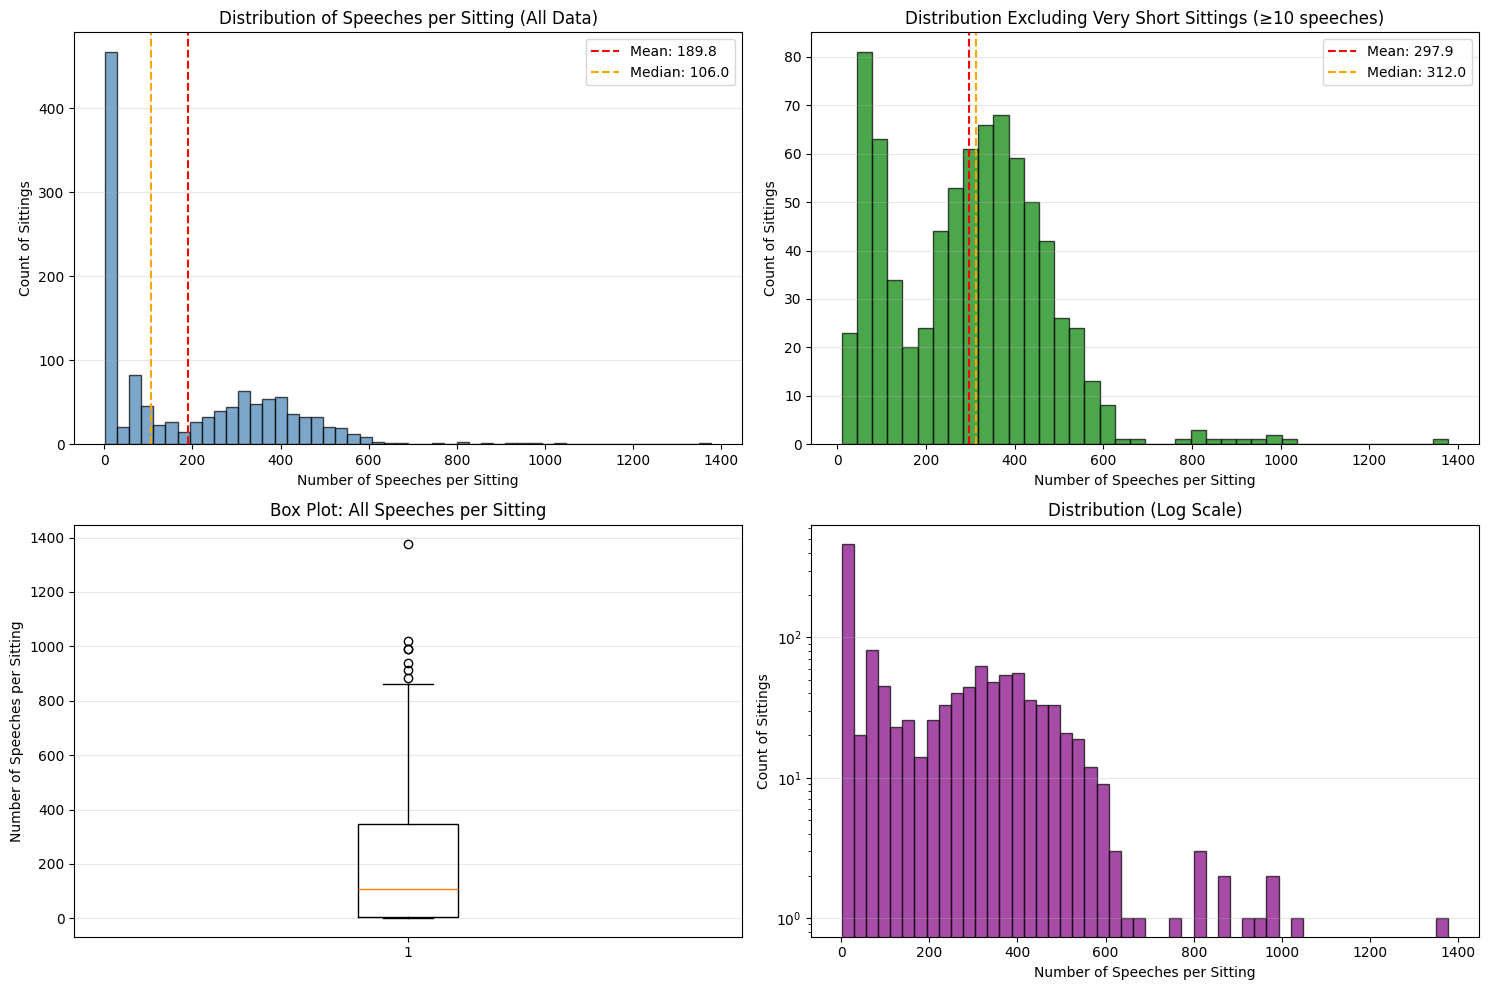

📊 Detailed Sitting Length Statistics:
  • Total sittings: 1,221
  • Mean speeches per sitting: 189.81
  • Median speeches per sitting: 106.0
  • Standard deviation: 198.94
  • 25th percentile: 3.0
  • 75th percentile: 348.0

📈 Distribution breakdown:
  • Very short sittings (<10 speeches): 448 (36.7%)
  • Short sittings (10-50 speeches): 26 (2.1%)
  • Medium sittings (50-100 speeches): 131 (10.7%)
  • Long sittings (100-200 speeches): 74 (6.1%)
  • Very long sittings (≥200 speeches): 542 (44.4%)

🔍 Bimodal Distribution Analysis:
  • Very short sittings make up 448 of 1221 total (36.7%)
  • Very long sittings make up 542 of 1221 total (44.4%)
  • Combined, these two extremes represent 81.1% of all sittings

📋 Very Short Sittings Detail:
  • Range: 1 to 9 speeches
  • Most common counts: {3: 346, 4: 33, 2: 29, 5: 22, 6: 12}
  • These might represent: procedural meetings, brief sessions, or data artifacts

📊 Statistics for Substantial Sittings (≥10 speeches):
  • Count: 773 sittings
  • M

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# === SITTING LENGTH DISTRIBUTION HISTOGRAM ===
plt.figure(figsize=(15, 10))

# Calculate speeches per sitting
sitting_speeches = AT_en.groupby('Text_ID').size()

# Create main histogram
plt.subplot(2, 2, 1)
plt.hist(sitting_speeches, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Number of Speeches per Sitting')
plt.ylabel('Count of Sittings')
plt.title('Distribution of Speeches per Sitting (All Data)')
plt.grid(axis='y', alpha=0.3)

# Add vertical lines for key statistics
plt.axvline(sitting_speeches.mean(), color='red', linestyle='--', 
           label=f'Mean: {sitting_speeches.mean():.1f}')
plt.axvline(sitting_speeches.median(), color='orange', linestyle='--', 
           label=f'Median: {sitting_speeches.median():.1f}')
plt.legend()

# Create histogram excluding very short sittings for better detail
plt.subplot(2, 2, 2)
sitting_speeches_filtered = sitting_speeches[sitting_speeches >= 10]
plt.hist(sitting_speeches_filtered, bins=40, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Number of Speeches per Sitting')
plt.ylabel('Count of Sittings')
plt.title('Distribution Excluding Very Short Sittings (≥10 speeches)')
plt.grid(axis='y', alpha=0.3)
plt.axvline(sitting_speeches_filtered.mean(), color='red', linestyle='--', 
           label=f'Mean: {sitting_speeches_filtered.mean():.1f}')
plt.axvline(sitting_speeches_filtered.median(), color='orange', linestyle='--', 
           label=f'Median: {sitting_speeches_filtered.median():.1f}')
plt.legend()

# Create box plot for additional insight
plt.subplot(2, 2, 3)
plt.boxplot(sitting_speeches, vert=True)
plt.ylabel('Number of Speeches per Sitting')
plt.title('Box Plot: All Speeches per Sitting')
plt.grid(axis='y', alpha=0.3)

# Log scale histogram to better show the distribution
plt.subplot(2, 2, 4)
plt.hist(sitting_speeches, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Number of Speeches per Sitting')
plt.ylabel('Count of Sittings')
plt.title('Distribution (Log Scale)')
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"📊 Detailed Sitting Length Statistics:")
print(f"  • Total sittings: {len(sitting_speeches):,}")
print(f"  • Mean speeches per sitting: {sitting_speeches.mean():.2f}")
print(f"  • Median speeches per sitting: {sitting_speeches.median():.1f}")
print(f"  • Standard deviation: {sitting_speeches.std():.2f}")
print(f"  • 25th percentile: {sitting_speeches.quantile(0.25):.1f}")
print(f"  • 75th percentile: {sitting_speeches.quantile(0.75):.1f}")

print(f"\n📈 Distribution breakdown:")
print(f"  • Very short sittings (<10 speeches): {(sitting_speeches < 10).sum():,} ({(sitting_speeches < 10).mean()*100:.1f}%)")
print(f"  • Short sittings (10-50 speeches): {((sitting_speeches >= 10) & (sitting_speeches < 50)).sum():,} ({((sitting_speeches >= 10) & (sitting_speeches < 50)).mean()*100:.1f}%)")
print(f"  • Medium sittings (50-100 speeches): {((sitting_speeches >= 50) & (sitting_speeches < 100)).sum():,} ({((sitting_speeches >= 50) & (sitting_speeches < 100)).mean()*100:.1f}%)")
print(f"  • Long sittings (100-200 speeches): {((sitting_speeches >= 100) & (sitting_speeches < 200)).sum():,} ({((sitting_speeches >= 100) & (sitting_speeches < 200)).mean()*100:.1f}%)")
print(f"  • Very long sittings (≥200 speeches): {(sitting_speeches >= 200).sum():,} ({(sitting_speeches >= 200).mean()*100:.1f}%)")

# Analysis of the bimodal distribution
print(f"\n🔍 Bimodal Distribution Analysis:")
very_short = sitting_speeches < 10
very_long = sitting_speeches >= 200
print(f"  • Very short sittings make up {very_short.sum()} of {len(sitting_speeches)} total ({very_short.mean()*100:.1f}%)")
print(f"  • Very long sittings make up {very_long.sum()} of {len(sitting_speeches)} total ({very_long.mean()*100:.1f}%)")
print(f"  • Combined, these two extremes represent {(very_short.sum() + very_long.sum())/len(sitting_speeches)*100:.1f}% of all sittings")

# Investigate what these very short sittings might represent
very_short_stats = sitting_speeches[very_short]
print(f"\n📋 Very Short Sittings Detail:")
print(f"  • Range: {very_short_stats.min()} to {very_short_stats.max()} speeches")
print(f"  • Most common counts: {very_short_stats.value_counts().head().to_dict()}")
print(f"  • These might represent: procedural meetings, brief sessions, or data artifacts")

# Statistics excluding very short sittings
substantial_sittings = sitting_speeches[sitting_speeches >= 10]
print(f"\n📊 Statistics for Substantial Sittings (≥10 speeches):")
print(f"  • Count: {len(substantial_sittings):,} sittings")
print(f"  • Mean: {substantial_sittings.mean():.1f} speeches")
print(f"  • Median: {substantial_sittings.median():.1f} speeches")
print(f"  • Standard deviation: {substantial_sittings.std():.1f}")

## Topic Modeling with BERTopic

This notebook focuses on topic modeling using pre-segmented parliamentary speeches. The data has already been processed with:
- Speech-level embeddings for similarity analysis
- Segment-level embeddings for topic modeling
- Parliamentary-aware segmentation with agenda detection

We'll implement hierarchical BERTopic with LLM classification to map topics to 22 policy categories.

In [10]:
# === BERTOPIC SETUP WITH GUIDED TOPICS ===
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from umap import UMAP
import openai
import os
from dotenv import load_dotenv

# Define the 22 target topic categories
label_list = [
    "Education", "Technology", "Health", "Environment", "Housing", "Labor", 
    "Defense", "Government Operations", "Social Welfare", "Other", "Macroeconomics", 
    "Domestic Commerce", "Civil Rights", "International Affairs", "Transportation", 
    "Immigration", "Law and Crime", "Agriculture", "Foreign Trade", "Culture", 
    "Public Lands", "Energy"
]

# Detailed topic descriptions for better classification
majortopics_description = {
    'Macroeconomics': 'issues related to domestic macroeconomic policy, such as the state and prospect of the national economy, economic policy, inflation, interest rates, monetary policy, cost of living, unemployment rate, national budget, public debt, price control, tax enforcement, industrial revitalization and growth.',
    'Civil Rights': 'issues related to civil rights and minority rights, discrimination towards races, gender, sexual orientation, handicap, and other minorities, voting rights, freedom of speech, religious freedoms, privacy rights, protection of personal data, abortion rights, anti-government activity groups (e.g., local insurgency groups), religion and the Church.',
    'Health': 'issues related to health care, health care reforms, health insurance, drug industry, medical facilities, medical workers, disease prevention, treatment, and health promotion, drug and alcohol abuse, mental health, research in medicine, medical liability and unfair medical practices.',
    'Agriculture': 'issues related to agriculture policy, fishing, agricultural foreign trade, food marketing, subsidies to farmers, food inspection and safety, animal and crop disease, pest control and pesticide regulation, welfare for animals in farms, pets, veterinary medicine, agricultural research.',
    'Labor': 'issues related to labor, employment, employment programs, employee benefits, pensions and retirement accounts, minimum wage, labor law, job training, labor unions, worker safety and protection, youth employment and seasonal workers.',
    'Education': 'issues related to educational policies, primary and secondary schools, student loans and education finance, the regulation of colleges and universities, school reforms, teachers, vocational training, evening schools, safety in schools, efforts to improve educational standards, and issues related to libraries, dictionaries, teaching material, research in education.',
    'Environment': 'issues related to environmental policy, drinking water safety, all kinds of pollution (air, noise, soil), waste disposal, recycling, climate change, outdoor environmental hazards (e.g., asbestos), species and forest protection, marine and freshwater environment, hunting, regulation of laboratory or performance animals, land and water resource conservation, research in environmental technology.',
    'Energy': 'issues related to energy policy, electricity, regulation of electrical utilities, nuclear energy and disposal of nuclear waste, natural gas and oil, drilling, oil spills, oil and gas prices, heat supply, shortages and gasoline regulation, coal production, alternative and renewable energy, energy conservation and energy efficiency, energy research.',
    'Immigration': 'issues related to immigration, refugees, and citizenship, integration issues, regulation of residence permits, asylum applications; criminal offences and diseases caused by immigration.',
    'Transportation': 'issues related to mass transportation construction and regulation, bus transport, regulation related to motor vehicles, road construction, maintenance and safety, parking facilities, traffic accidents statistics, air travel, rail travel, rail freight, maritime transportation, inland waterways and channels, transportation research and development.',
    'Law and Crime': 'issues related to the control, prevention, and impact of crime; all law enforcement agencies, including border and customs, police, court system, prison system; terrorism, white collar crime, counterfeiting and fraud, cyber-crime, drug trafficking, domestic violence, child welfare, family law, juvenile crime.',
    'Social Welfare': 'issues related to social welfare policy, the Ministry of Social Affairs, social services, poverty assistance for low-income families and for the elderly, parental leave and child care, assistance for people with physical or mental disabilities, including early retirement pension, discounts on public services, volunteer associations (e.g., Red Cross), charities, and youth organizations.',
    'Housing': 'issues related to housing, urban affairs and community development, housing market, property tax, spatial planning, rural development, location permits, construction inspection, illegal construction, industrial and commercial building issues, national housing policy, housing for low-income individuals, rental housing, housing for the elderly, e.g., nursing homes, housing for the homeless and efforts to reduce homelessness, research related to housing.',
    'Domestic Commerce': 'issues related to banking, finance and internal commerce, including stock exchange, investments, consumer finance, mortgages, credit cards, insurance availability and cost, accounting regulation, personal, commercial, and municipal bankruptcies, programs to promote small businesses, copyrights and patents, intellectual property, natural disaster preparedness and relief, consumer safety; regulation and promotion of tourism, sports, gambling, and personal fitness; domestic commerce research.',
    'Defense': 'issues related to defense policy, military intelligence, espionage, weapons, military personnel, reserve forces, military buildings, military courts, nuclear weapons, civil defense, including firefighters and mountain rescue services, homeland security, military aid or arms sales to other countries, prisoners of war and collateral damage to civilian populations, military nuclear and hazardous waste disposal and military environmental compliance, defense alliances and agreements, direct foreign military operations, claims against military, defense research.',
    'Technology': 'issues related to science and technology transfer and international science cooperation, research policy, government space programs and space exploration, telephones and telecommunication regulation, broadcast media (television, radio, newspapers, films), weather forecasting, geological surveys, computer industry, cyber security.',
    'Foreign Trade': 'issues related to foreign trade, trade negotiations, free trade agreements, import regulation, export promotion and regulation, subsidies, private business investment and corporate development, competitiveness, exchange rates, the strength of national currency in comparison to other currencies, foreign investment and sales of companies abroad.',
    'International Affairs': 'issues related to international affairs, foreign policy and relations to other countries, issues related to the Ministry of Foreign Affairs, foreign aid, international agreements (such as Kyoto agreement on the environment, the Schengen agreement), international organizations (including United Nations, UNESCO, International Olympic Committee, International Criminal Court), NGOs, issues related to diplomacy, embassies, citizens abroad; issues related to border control; issues related to international finance, including the World Bank and International Monetary Fund, the financial situation of the EU; issues related to a foreign country that do not impact the home country; issues related to human rights in other countries, international terrorism.',
    'Government Operations': 'issues related to general government operations, the work of multiple departments, public employees, postal services, nominations and appointments, national mints, medals, and commemorative coins, management of government property, government procurement and contractors, public scandal and impeachment, claims against the government, the state inspectorate and audit, anti-corruption policies, regulation of political campaigns, political advertising and voter registration, census and statistics collection by government; issues related to local government, capital city and municipalities, including decentralization; issues related to national holidays.',
    'Public Lands': 'issues related to national parks, memorials, historic sites, and protected areas, including the management and staffing of cultural sites; museums; use of public lands and forests, establishment and management of harbors and marinas; issues related to flood control, forest fires, livestock grazing.',
    'Culture': 'issues related to cultural policies, Ministry of Culture, public spending on culture, cultural employees, issues related to support of theatres and artists; allocation of funds from the national lottery, issues related to cultural heritage.',
    'Other': 'other topics not mentioning policy agendas, including the procedures of parliamentary meetings, e.g., points of order, voting procedures, meeting logistics; interpersonal speech, e.g., greetings, personal stories, tributes, interjections, arguments between the members; rhetorical speech, e.g., jokes, literary references.'
}

# Austrian parliament-specific stop words
custom_stopwords = [
    'mr', 'mrs', 'ms', 'dr', 'madam', 'honourable', 'member', 'members', 'vp', 'sp', 'fp', 
    'minister', 'speaker', 'deputy', 'president', 'chairman', 'chair', 'schilling', 
    'secretary', 'lord', 'lady', 'question', 'order', 'point', 'debate', 'motion', 'amendment',
    'congratulations', 'congratulate', 'thanks', 'thank', 'say', 'one', 'want', 'know', 'think', 
    'believe', 'see', 'go', 'come', 'give', 'take', 'people', 'federal', 'government', 'austria', 
    'austrian', 'committee', 'call', 'said', 'already', 'please', 'request', 'proceed', 'reading',
    'course', 'welcome', 'council', 'open', 'written', 'contain', 'items', 'item', 'yes', 'no', 
    'following', 'next', 'speech', 'year', 'years', 'state', 'also', 'would', 'like', 'may', 'must', 
    'upon', 'indeed', 'session', 'meeting', 'report', 'commission', 'behalf', 'gentleman', 'gentlemen', 
    'ladies', 'applause', 'group', 'colleague', 'colleagues', 'issue', 'issues', 'chancellor', 'court', 
    'ask', 'answer', 'reply', 'regard', 'regarding', 'regards', 'respect', 'respectfully', 'sign', 
    'shall', 'procedure', 'declare', 'hear', 'minutes', 'speaking', 'close', 'abg', 'mag', 'orf', 'wait'
]

all_stopwords = list(ENGLISH_STOP_WORDS) + custom_stopwords

# Prepare segment data for topic modeling  
segment_texts = AT_en.groupby('Segment_ID')['Text'].apply(lambda x: ' '.join(x)).tolist()
segment_embeddings = np.array(AT_en.groupby('Segment_ID')['Segment_Embeddings'].first().tolist())

# Configure vectorizer
vectorizer_model = CountVectorizer(
    stop_words=all_stopwords,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    max_features=1000
)

print(f"🎯 Target categories: {len(label_list)} topics")
print(f"📊 Topic modeling data prepared:")
print(f"  • Segments for modeling: {len(segment_texts)}")
print(f"  • Embedding dimension: {segment_embeddings.shape[1]}")
print(f"📖 Topic descriptions loaded for enhanced classification")

🎯 Target categories: 22 topics
📊 Topic modeling data prepared:
  • Segments for modeling: 9268
  • Embedding dimension: 1024
📖 Topic descriptions loaded for enhanced classification


In [13]:
# === HIERARCHICAL BERTOPIC (RECOMMENDED APPROACH) ===
from bertopic.representation import KeyBERTInspired
from hdbscan import HDBSCAN

def train_hierarchical_bertopic():
    """Train BERTopic with many subtopics, then map to 22 main categories."""
    print("🏗️ Training Hierarchical BERTopic with HDBSCAN...")
    
    # Configure UMAP and HDBSCAN for more granular topics
    umap_model = UMAP(n_neighbors=10, n_components=8, metric='cosine', random_state=42)
    
    # Use HDBSCAN to find clusters automatically.
    # A smaller min_cluster_size will result in more, smaller topics.
    clustering_model = HDBSCAN(
        min_cluster_size=10,
        metric='euclidean',
        cluster_selection_method='eom',
        prediction_data=True
    )
    
    representation_model = KeyBERTInspired()
    
    topic_model_hierarchical = BERTopic(
        embedding_model="all-MiniLM-L6-v2",
        umap_model=umap_model,
        hdbscan_model=clustering_model,
        vectorizer_model=vectorizer_model,
        representation_model=representation_model,
        min_topic_size=10,  # Align with min_cluster_size
        calculate_probabilities=True,
        verbose=True
    )
    
    topics, probs = topic_model_hierarchical.fit_transform(segment_texts, embeddings=segment_embeddings)
    topic_info_hierarchical = topic_model_hierarchical.get_topic_info()
    
    print(f"✅ Hierarchical model created {len(topic_info_hierarchical[topic_info_hierarchical['Topic'] != -1])} subtopics")
    
    return topic_model_hierarchical, topics, topic_info_hierarchical

# Train hierarchical model
topic_model_hierarchical, topics_hierarchical, topic_info_hierarchical = train_hierarchical_bertopic()

🏗️ Training Hierarchical BERTopic with HDBSCAN...


2025-09-28 17:10:04,637 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-28 17:10:20,712 - BERTopic - Dimensionality - Completed ✓
2025-09-28 17:10:20,717 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-28 17:10:20,712 - BERTopic - Dimensionality - Completed ✓
2025-09-28 17:10:20,717 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-28 17:10:30,026 - BERTopic - Cluster - Completed ✓
2025-09-28 17:10:30,037 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-28 17:10:30,026 - BERTopic - Cluster - Completed ✓
2025-09-28 17:10:30,037 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-28 17:14:18,498 - BERTopic - Representation - Completed ✓
2025-09-28 17:14:18,498 - BERTopic - Representation - Completed ✓


✅ Hierarchical model created 111 subtopics


In [14]:
topic_info_hierarchical

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2835,-1_budgetary_reforms_tax reform_pensions,"[budgetary, reforms, tax reform, pensions, exp...","[In the speech of Deputies Ofenauer, reference..."
1,0,621,0_voluntary time_limitation_duration_appointment,"[voluntary time, limitation, duration, appoint...",[As regards the negotiated items and their all...
2,1,490,1_education policy_quota_councils_reforms,"[education policy, quota, councils, reforms, c...",[Ladies and gentlemen! At the beginning of my ...
3,2,423,2_subcommittee_majority accepted_constitutiona...,"[subcommittee, majority accepted, constitution...",[I'll open the 102. Meeting of the National Co...
4,3,201,3_appointment_werner_electoral__other organiser,"[appointment, werner, electoral, _other organi...","[Ladies and gentlemen, ladies and gentlemen. I..."
...,...,...,...,...,...
107,106,11,106_animal welfare_law adopted_enforcement_dir...,"[animal welfare, law adopted, enforcement, dir...",[Mr President. Federal Minister! Mrs. State Se...
108,107,11,107_subcommittee_political responsibility_supe...,"[subcommittee, political responsibility, super...",[Mr President. Mrs. Federal Minister! Mr State...
109,108,11,108_infrastructure_railway_railways_transport ...,"[infrastructure, railway, railways, transport ...",[High house! My Dear Ones Ladies and gentlemen...
110,109,10,109_incomes_labour market_pensions_wages,"[incomes, labour market, pensions, wages, pens...",[Mr President. My Dear Ones Ladies and gentlem...


In [19]:
# === LLM CLASSIFICATION TO 22 CATEGORIES ===
import time
from openai import OpenAI

# Load environment variables
dotenv_path = os.path.join(os.pardir, '.env')
if os.path.exists(dotenv_path):
    load_dotenv(dotenv_path)
    print(f"✅ Loaded .env file from: {dotenv_path}")
else:
    print("⚠️ .env file not found. Ensure OPENAI_API_KEY is set in environment.")

def classify_topic_to_22_categories(topic_words, topic_id=-1, max_retries=3):
    """Enhanced classification using detailed topic descriptions with rate limiting."""
    if not isinstance(topic_words, list) or not topic_words:
        return "Other"
    
    keywords_str = ', '.join(topic_words[:8])  # Reduced from 12 to 8 to save tokens
    
    # Simplified category list for token efficiency
    categories_short = '\n'.join([f"• {cat}" for cat in label_list])
    
    # Shorter, more efficient prompt
    prompt = f"""Classify this parliamentary topic into ONE category from the list below.

TOPIC KEYWORDS: {keywords_str}

CATEGORIES:
{categories_short}

Rules:
- Choose the single best match
- Parliamentary procedures → "Other"
- Economic topics → "Macroeconomics"
- Social issues → "Social Welfare"
- Legal/court topics → "Law and Crime"

RESPONSE: Category name only."""

    for attempt in range(max_retries):
        try:
            if not os.getenv('OPENAI_API_KEY'):
                print(f"Error: OPENAI_API_KEY not set for topic {topic_id}")
                return "Other"
            
            client = OpenAI()
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": "You classify parliamentary topics. Respond with exact category name only."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0.1,
                max_tokens=20  # Reduced from 30
            )
            
            classification = response.choices[0].message.content.strip()
            
            # Clean the response
            classification = classification.replace('"', '').replace("'", "").strip()
            
            # Exact match check
            if classification in label_list:
                return classification
            
            # Fuzzy matching
            classification_lower = classification.lower()
            for category in label_list:
                if category.lower() == classification_lower:
                    return category
                if category.lower() in classification_lower or classification_lower in category.lower():
                    return category
                    
            # Common variations mapping
            category_mapping = {
                'macro': 'Macroeconomics',
                'economics': 'Macroeconomics', 
                'economic': 'Macroeconomics',
                'rights': 'Civil Rights',
                'welfare': 'Social Welfare',
                'social': 'Social Welfare',
                'crime': 'Law and Crime',
                'legal': 'Law and Crime',
                'justice': 'Law and Crime',
                'foreign': 'International Affairs',
                'international': 'International Affairs',
                'trade': 'Foreign Trade',
                'government': 'Government Operations',
                'administration': 'Government Operations'
            }
            
            for key, mapped_category in category_mapping.items():
                if key in classification_lower:
                    return mapped_category
            
            return "Other"
                
        except Exception as e:
            error_msg = str(e)
            if "rate_limit" in error_msg.lower():
                # Extract wait time from error message or use exponential backoff
                wait_time = 2 ** attempt + 1  # 3, 5, 9 seconds
                print(f"Rate limit hit for topic {topic_id}. Waiting {wait_time}s (attempt {attempt + 1}/{max_retries})...")
                time.sleep(wait_time)
                continue
            else:
                print(f"Error classifying topic {topic_id} (attempt {attempt + 1}): {e}")
                if attempt == max_retries - 1:
                    return "Other"
                time.sleep(1)
    
    print(f"Failed to classify topic {topic_id} after {max_retries} attempts")
    return "Other"

def map_topics_to_22_categories(topic_info, approach_name):
    """Map topics to the 22 predefined categories using LLM classification with rate limiting."""
    print(f"🤖 Classifying {approach_name} topics into 22 categories...")
    print(f"⏱️  Using rate-limited API calls with retry logic...")
    
    topic_info_classified = topic_info.copy()
    topic_info_classified['Category_22'] = "Other"
    
    classification_results = []
    total_topics = len(topic_info_classified[topic_info_classified['Topic'] != -1])
    
    for idx, row in topic_info_classified.iterrows():
        if row['Topic'] != -1:
            current_topic = len(classification_results) + 1
            print(f"Processing topic {current_topic}/{total_topics} (ID: {row['Topic']})", end=" -> ")
            
            topic_words = row['Representation']
            classification = classify_topic_to_22_categories(topic_words, row['Topic'])
            topic_info_classified.loc[idx, 'Category_22'] = classification
            
            print(f"{classification}")
            
            classification_results.append({
                'Topic_ID': row['Topic'],
                'Keywords': ', '.join(topic_words[:5]),
                'Classification': classification,
                'Count': row['Count']
            })
            
            # Small delay between requests to avoid rate limits
            time.sleep(0.5)
    
    # Count topics per category
    category_counts = topic_info_classified[topic_info_classified['Topic'] != -1]['Category_22'].value_counts()
    
    print(f"\n📊 {approach_name} - Classification results:")
    for category in label_list:
        count = category_counts.get(category, 0)
        if count > 0:
            topic_count = len(classification_results)
            percentage = (count / topic_count * 100) if topic_count > 0 else 0
            print(f"  • {category:<20}: {count:>2} topics ({percentage:>5.1f}%)")
    
    return topic_info_classified

# Apply LLM classification with rate limiting
print("🚀 Applying LLM classification to map subtopics to 22 categories...")
print("💡 Using optimized prompts and rate limiting to handle API constraints...")
topic_info_classified = map_topics_to_22_categories(topic_info_hierarchical, "Hierarchical BERTopic")

✅ Loaded .env file from: ..\.env
🚀 Applying LLM classification to map subtopics to 22 categories...
💡 Using optimized prompts and rate limiting to handle API constraints...
🤖 Classifying Hierarchical BERTopic topics into 22 categories...
⏱️  Using rate-limited API calls with retry logic...
Processing topic 1/111 (ID: 0) -> Other
Other
Processing topic 2/111 (ID: 1) -> Processing topic 2/111 (ID: 1) -> Education
Education
Processing topic 3/111 (ID: 2) -> Processing topic 3/111 (ID: 2) -> Government Operations
Government Operations
Processing topic 4/111 (ID: 3) -> Processing topic 4/111 (ID: 3) -> Government Operations
Government Operations
Processing topic 5/111 (ID: 4) -> Processing topic 5/111 (ID: 4) -> Social Welfare
Social Welfare
Processing topic 6/111 (ID: 5) -> Processing topic 6/111 (ID: 5) -> Law and Crime
Law and Crime
Processing topic 7/111 (ID: 6) -> Processing topic 7/111 (ID: 6) -> Macroeconomics
Macroeconomics
Processing topic 8/111 (ID: 7) -> Processing topic 8/111 (I